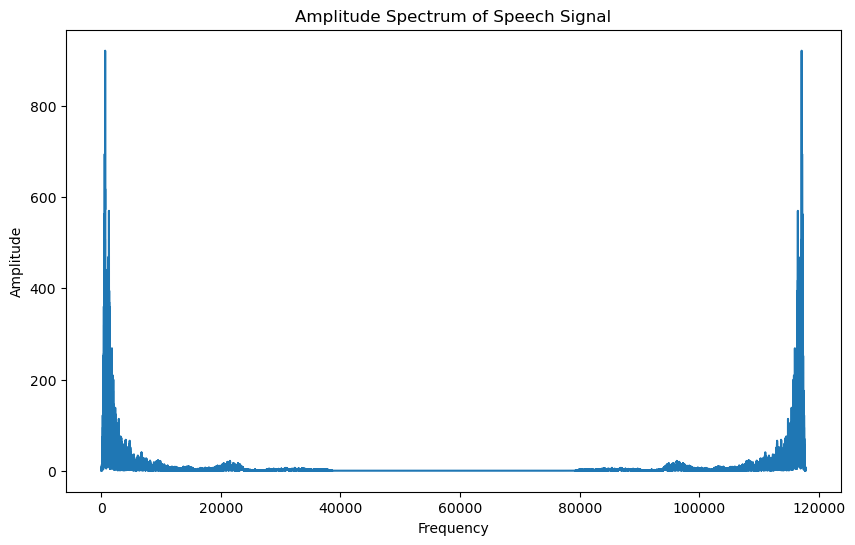

In [3]:
import numpy as np  # Import NumPy module
import matplotlib.pyplot as plt
import librosa

# Load the speech signal data using librosa
speech_signal, sample_rate = librosa.load("sentence.wav", sr=None)

# A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain
spectrum = np.fft.fft(speech_signal)
amplitude_spectrum = np.abs(spectrum)

# Plot the amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


C:\Users\Bindu\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
C:\Users\Bindu\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


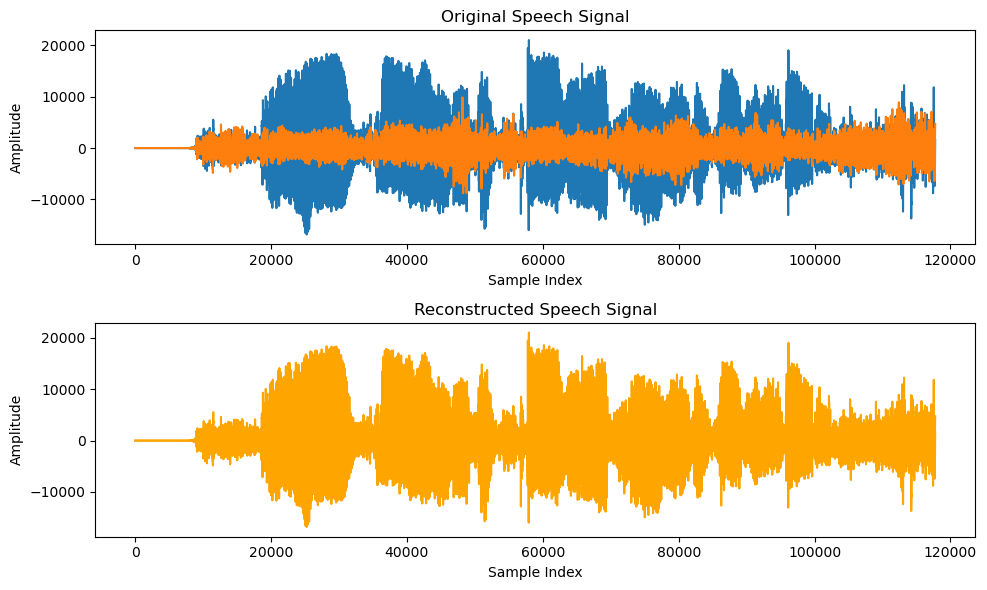

In [1]:
#Use numpy.fft.ifft()to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.
import numpy as np
import matplotlib.pyplot as plt
import pydub

# Load your audio file (replace 'test.mp3' with your actual file)
def read_audio(file_path):
    a = pydub.AudioSegment.from_mp3(file_path)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    return a.frame_rate, y

# Assuming you have an audio file named 'test.mp3'
sampling_rate, speech_signal = read_audio('sentence.wav')

# Compute the FFT
fft_result = np.fft.fft(speech_signal)

# Perform IFFT
ifft_result = np.fft.ifft(fft_result)

# Plot the original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(speech_signal, label='Original Signal')  # Removed [:, 0]
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Original Speech Signal")

plt.subplot(2, 1, 2)
plt.plot(ifft_result, label='Reconstructed Signal', color='orange')
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Reconstructed Speech Signal")

plt.tight_layout()
plt.show()

In [6]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


C:\Users\Bindu\AppData\Local\Temp\ipykernel_10928\4173349485.py:34: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t_full, f_full, 10 * np.log10(Sxx_full), shading='gouraud')


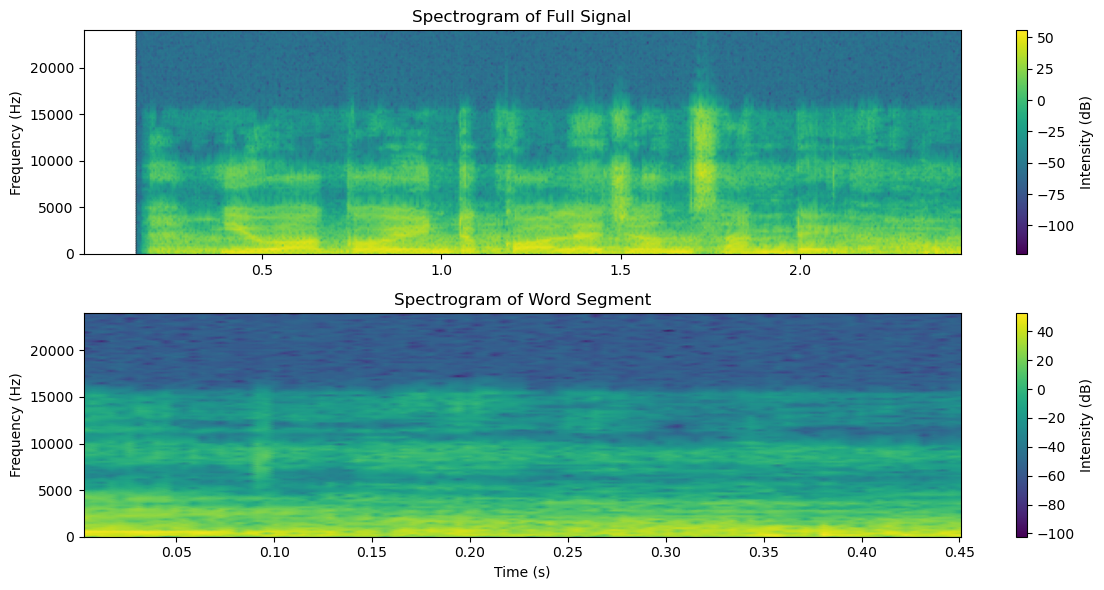

In [2]:
#Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import pydub

# Function to read audio file
def read_audio(file_path):
    a = pydub.AudioSegment.from_file(file_path)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    return a.frame_rate, y

# Load the audio file
sampling_rate, full_signal = read_audio('sentence.wav')

# Identify the word segment (replace with actual start and end times)
start_time = 2.0  # Start time in seconds
end_time = 3.5    # End time in seconds
word_segment = full_signal[int(start_time * sampling_rate):int(end_time * sampling_rate)]

# Compute the spectrogram for the full signal
f_full, t_full, Sxx_full = spectrogram(full_signal[:, 0], fs=sampling_rate)

# Compute the spectrogram for the word segment
f_word, t_word, Sxx_word = spectrogram(word_segment[:, 0], fs=sampling_rate)

# Plot the spectrograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.pcolormesh(t_full, f_full, 10 * np.log10(Sxx_full), shading='gouraud')
plt.title("Spectrogram of Full Signal")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Intensity (dB)')

plt.subplot(2, 1, 2)
plt.pcolormesh(t_word, f_word, 10 * np.log10(Sxx_word), shading='gouraud')
plt.title("Spectrogram of Word Segment")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Intensity (dB)')

plt.tight_layout()
plt.show()

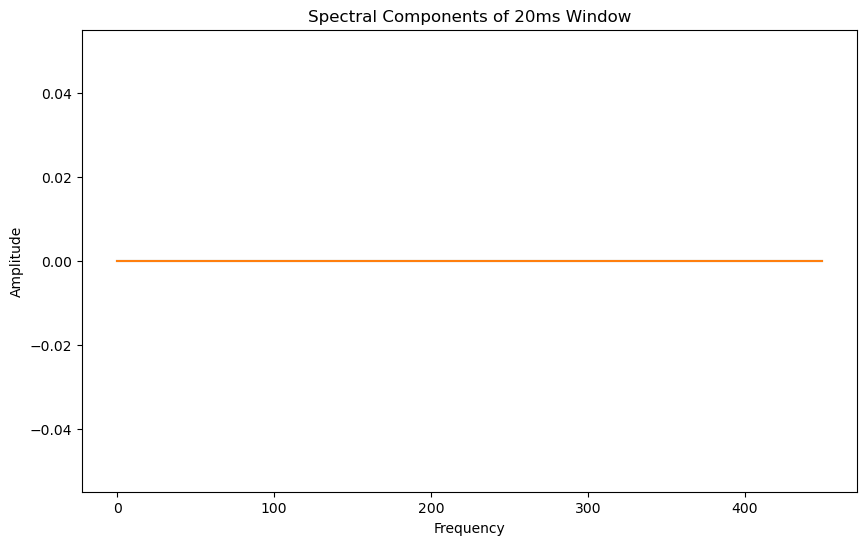

In [3]:
#Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.
sample_rate = 22500  # Assuming a sample rate of 22.5 KHz
window_size = int(0.02 * sample_rate)  # 20 mili-second window
window = speech_signal[:window_size]
window_spectrum = np.fft.fft(window)
window_amplitude_spectrum = np.abs(window_spectrum)

# Plot the spectral components of the window
plt.figure(figsize=(10, 6))
plt.plot(window_amplitude_spectrum)
plt.title('Spectral Components of 20ms Window')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

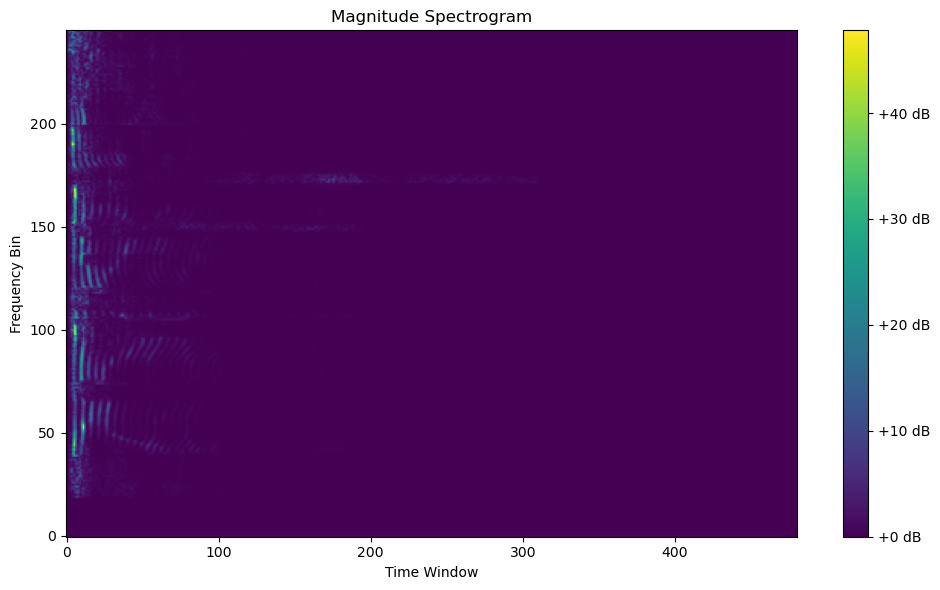

In [4]:
#Break your speech signal into window lengths of 20 mSec intervals.Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix.You may use librosa.stft()or scipy.signal.stft()as well to achieve this.
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load the speech signal data using librosa
speech_signal, sample_rate = librosa.load("sentence.wav", sr=None)

# Define window length and hop length (20 ms window)
window_length = int(sample_rate * 0.02)  # 20 ms in samples
hop_length = int(window_length / 2)  # Hop length is half the window length for 50% overlap

# Compute STFT
D = librosa.stft(speech_signal, n_fft=window_length, hop_length=hop_length)

# Convert complex STFT matrix to magnitude spectrogram
magnitude_spectrogram = np.abs(D)

# Transpose the spectrogram so that each column represents a time window
magnitude_spectrogram = np.transpose(magnitude_spectrogram)

# Create a heatmap plot
plt.figure(figsize=(10, 6))
plt.imshow(magnitude_spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrogram')
plt.xlabel('Time Window')
plt.ylabel('Frequency Bin')
plt.tight_layout()
plt.show()

C:\Users\Bindu\AppData\Local\Temp\ipykernel_10928\3151873477.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')


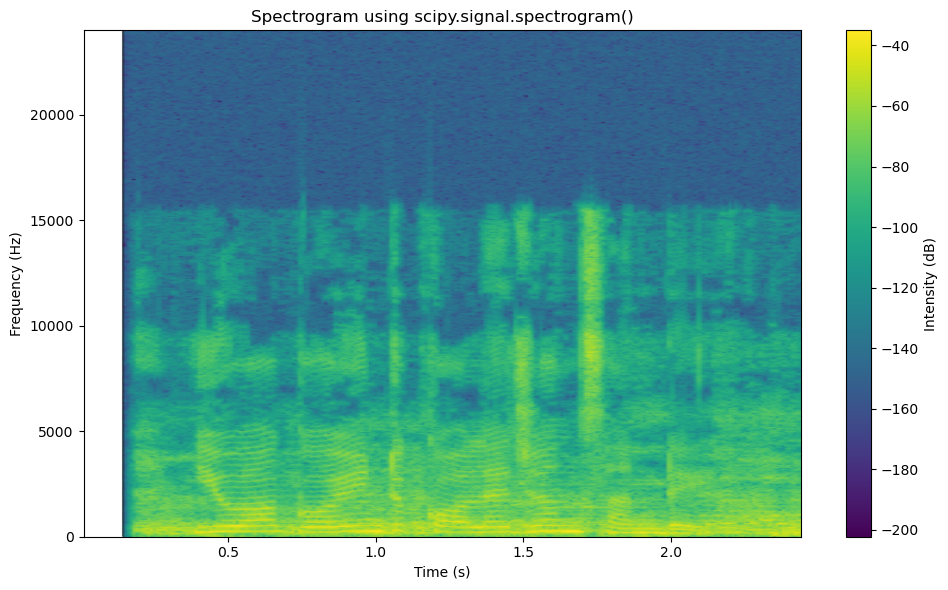

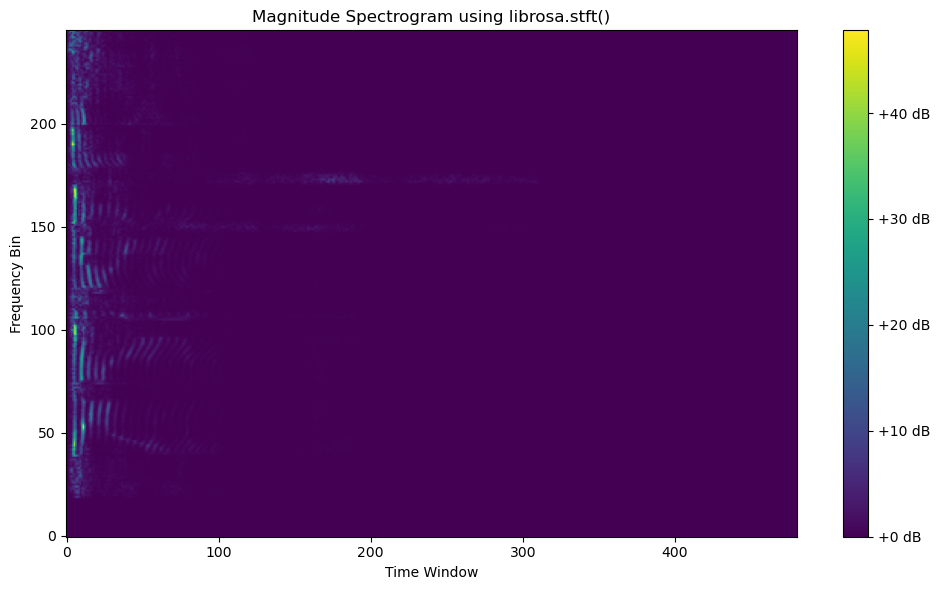

In [5]:
#Use scipy.signal.spectrogram()to plot the spectrogram of the speech signal at the same duration. Compare the plots.
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import spectrogram

# Load the speech signal data using librosa
speech_signal, sample_rate = librosa.load("sentence.wav", sr=None)

# Define window length and hop length (20 ms window)
window_length = int(sample_rate * 0.02)  # 20 ms in samples
hop_length = int(window_length / 2)  # Hop length is half the window length for 50% overlap

# Compute spectrogram using scipy.signal.spectrogram
frequencies, times, Sxx = spectrogram(speech_signal, fs=sample_rate, nperseg=window_length, noverlap=hop_length)

# Create a heatmap plot for scipy.signal.spectrogram()
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram using scipy.signal.spectrogram()')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

# Compute STFT using librosa
D = librosa.stft(speech_signal, n_fft=window_length, hop_length=hop_length)

# Convert complex STFT matrix to magnitude spectrogram
magnitude_spectrogram = np.abs(D)

# Transpose the spectrogram so that each column represents a time window
magnitude_spectrogram = np.transpose(magnitude_spectrogram)

# Create a heatmap plot for librosa.stft()
plt.figure(figsize=(10, 6))
plt.imshow(magnitude_spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrogram using librosa.stft()')
plt.xlabel('Time Window')
plt.ylabel('Frequency Bin')
plt.tight_layout()
plt.show()